<a href="https://colab.research.google.com/github/Sneha-Shahane/CodeVerse/blob/main/mlt_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

#1 Load the dataset
df = pd.read_csv('/content/Crop_recommendation.csv')

# Display the first 5 rows of the dataframe
display(df.head())

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
# Get information about the dataframe
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


None

In [6]:
# Get descriptive statistics of the numerical columns
display(df.describe())

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
# Check the number of unique values in each column
display(df.nunique())

,0
N,137
P,117
K,73
temperature,2200
humidity,2200
ph,2200
rainfall,2200
label,22


In [8]:
# Check the distribution of the target variable 'label'
display(df['label'].value_counts())

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [9]:
# Measures of central tendency
print("Measures of Central Tendency:")
display(df.mean(numeric_only=True))
display(df.median(numeric_only=True))
display(df.mode(numeric_only=True).iloc[0])

Measures of Central Tendency:


,0
N,50.551818
P,53.362727
K,48.149091
temperature,25.616244
humidity,71.481779
ph,6.469480
rainfall,103.463655


,0
N,37.000000
P,51.000000
K,32.000000
temperature,25.598693
humidity,80.473146
ph,6.425045
rainfall,94.867624


,0
N,22.000000
P,60.000000
K,17.000000
temperature,8.825675
humidity,14.258040
ph,3.504752
rainfall,20.211267


In [10]:
# Variance and Standard Deviation
print("\nVariance:")
display(df.var(numeric_only=True))
print("\nStandard Deviation:")
display(df.std(numeric_only=True))


Variance:


,0
N,1362.889537
P,1088.068460
K,2565.212869
temperature,25.641550
humidity,495.677307
ph,0.598980
rainfall,3020.424469



Standard Deviation:


,0
N,36.917334
P,32.985883
K,50.647931
temperature,5.063749
humidity,22.263812
ph,0.773938
rainfall,54.958389



Skewness:


,0
N,0.509721
P,1.010773
K,2.375167
temperature,0.184933
humidity,-1.091708
ph,0.283929
rainfall,0.965756



Visualizing Skewness for N:


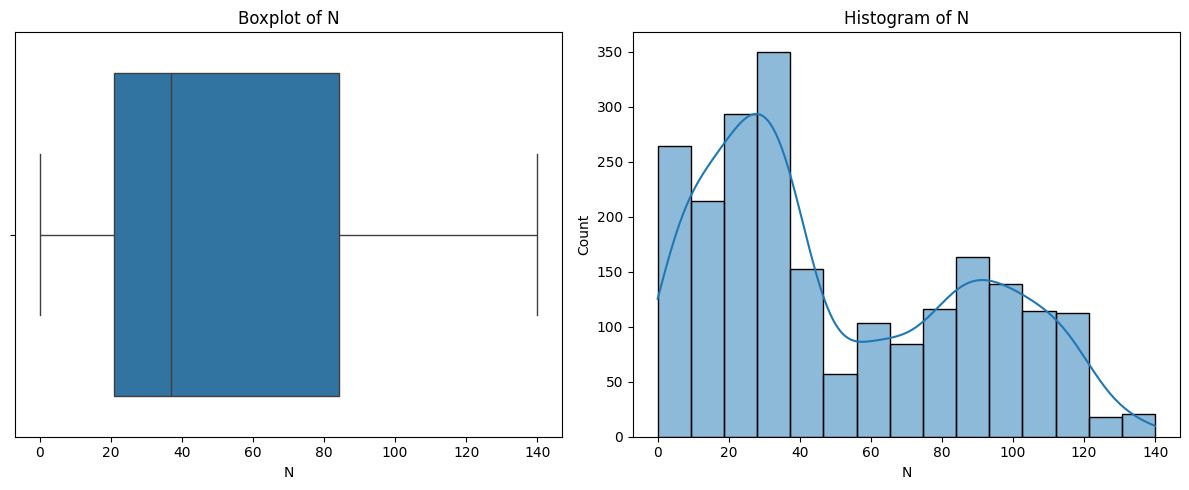


Visualizing Skewness for P:


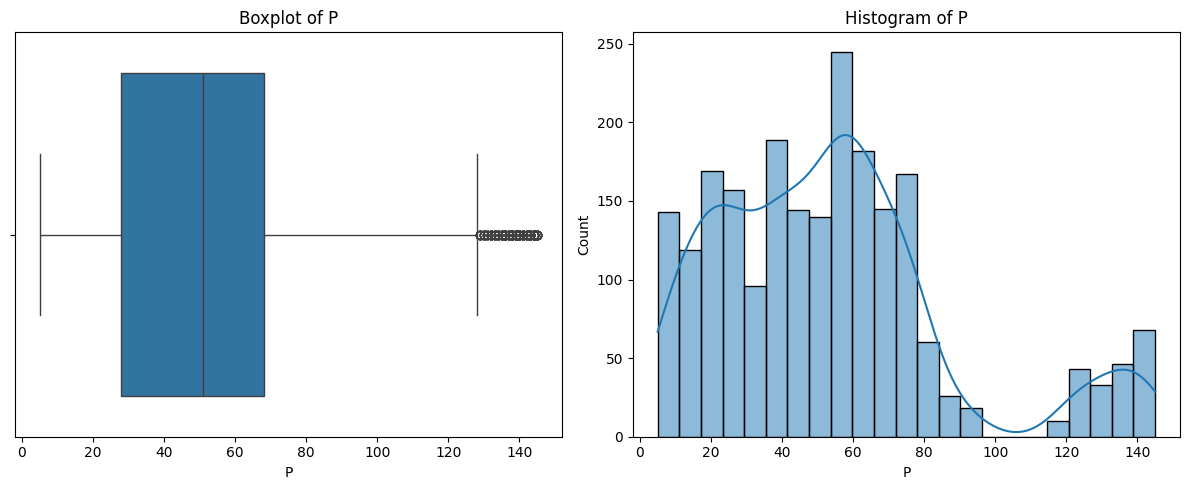


Visualizing Skewness for K:


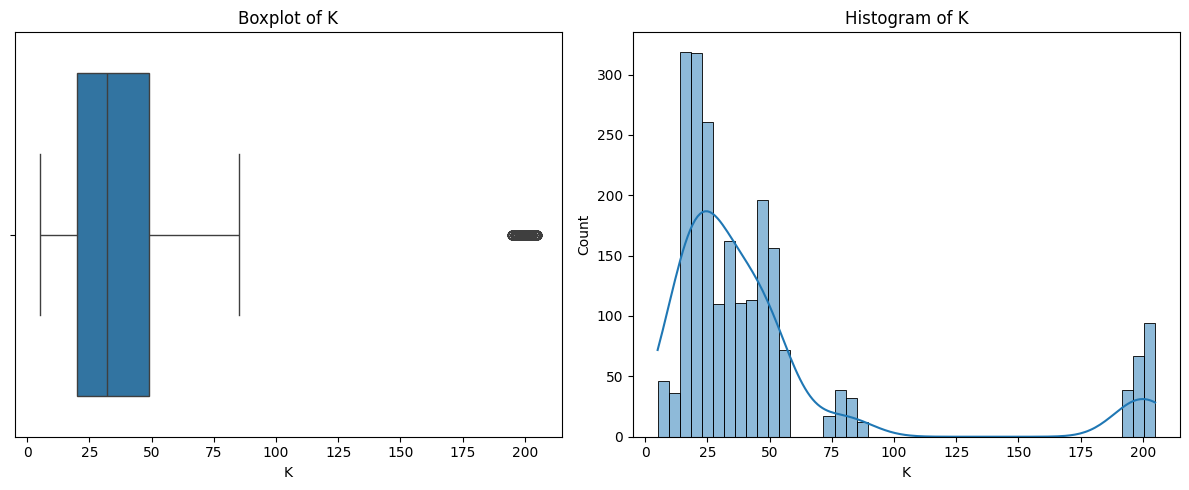


Visualizing Skewness for temperature:


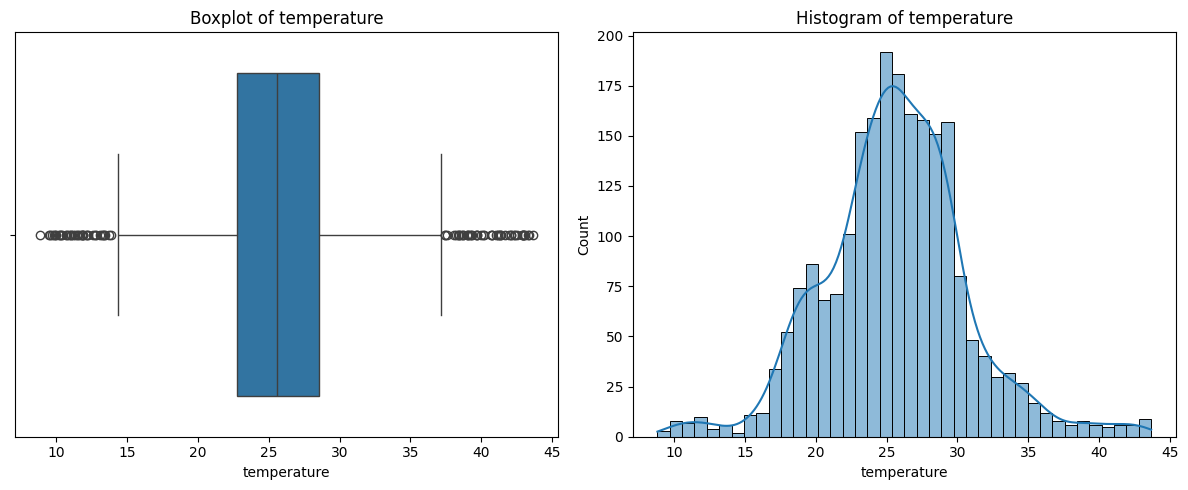


Visualizing Skewness for humidity:


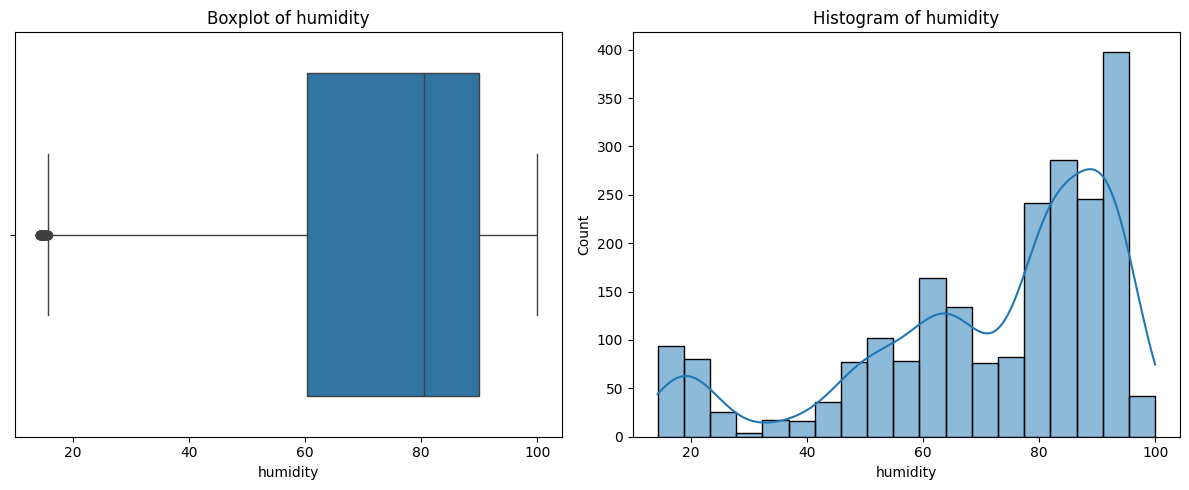


Visualizing Skewness for ph:


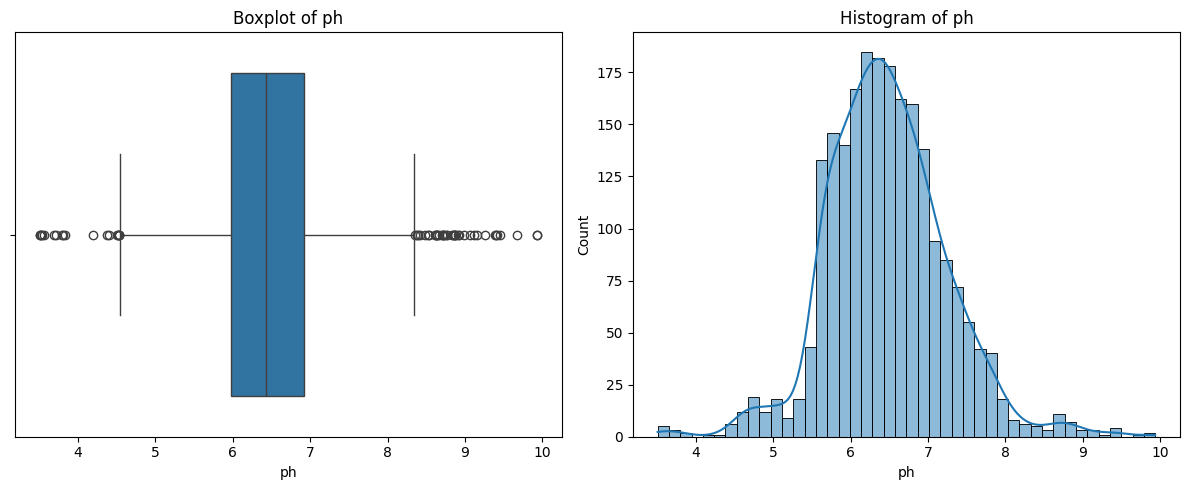


Visualizing Skewness for rainfall:


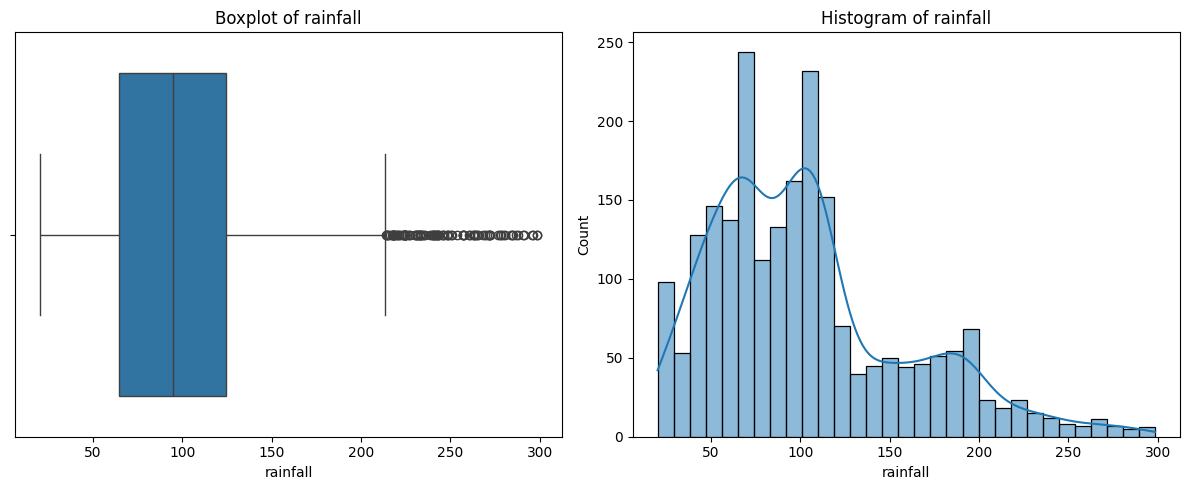

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Skewness
print("\nSkewness:")
display(df.skew(numeric_only=True))

# Boxplots and Histograms for visualizing skewness
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for col in numerical_cols:
    print(f"\nVisualizing Skewness for {col}:")
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.tight_layout()
    plt.show()

### Business Decisions based on Kurtosis

Kurtosis measures the "tailedness" of the probability distribution of a real-valued random variable. In the context of this dataset and the potential machine learning problem of crop recommendation, analyzing kurtosis can provide insights into the presence of outliers or extreme values in the environmental factors.

*   **High Kurtosis (Leptokurtic):** Indicates that the distribution has heavier tails and a sharper peak than a normal distribution. This means there are more outliers or extreme values. In our case, high kurtosis in a feature like rainfall or temperature could indicate that certain crops are exposed to unusually high or low values of these factors. This information is valuable for understanding the robustness of crops to extreme conditions and for making recommendations that are suitable for areas with volatile climates.

*   **Low Kurtosis (Platykurtic):** Indicates that the distribution has lighter tails and a flatter peak than a normal distribution. This suggests fewer outliers. For environmental factors, this might imply more stable conditions without significant extremes.

*   **Mesokurtic:** Similar to a normal distribution in terms of tailedness.

For this dataset, observing high kurtosis in any of the environmental features would be particularly interesting. It would prompt further investigation into these extreme data points and how they correlate with specific crop types. Understanding these relationships can help in building a more robust recommendation system that accounts for variability in environmental conditions. If there are features with high kurtosis, it might be beneficial to consider transformations or robust models that are less sensitive to outliers, depending on the modeling approach chosen.

In [12]:
# Kurtosis
print("\nKurtosis:")
display(df.kurtosis(numeric_only=True))


Kurtosis:


,0
N,-1.058240
P,0.860279
K,4.449354
temperature,1.232555
humidity,0.302134
ph,1.655581
rainfall,0.607079


### Exploratory Data Analysis: Visualizations

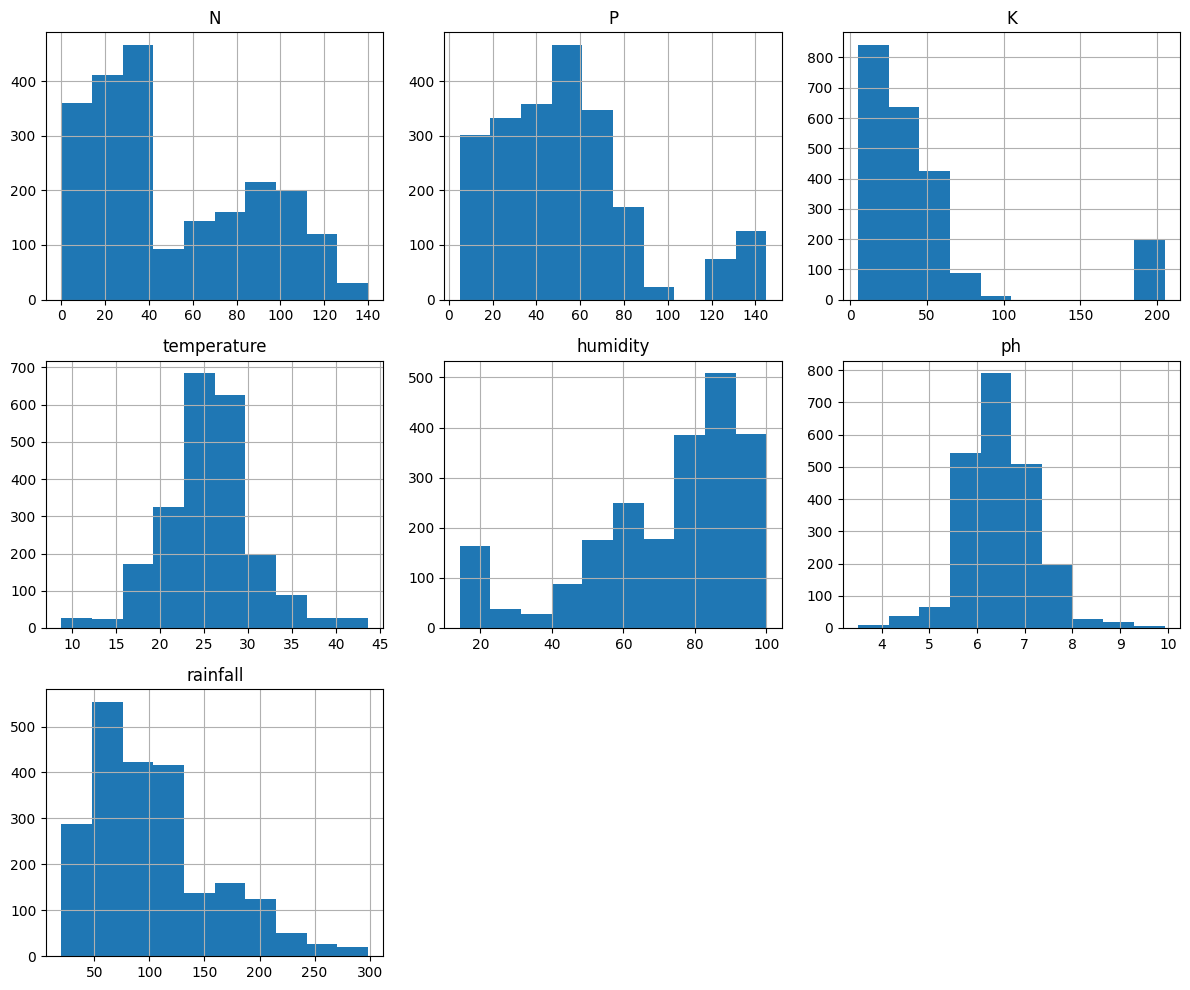

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for quantitative data
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
df[numerical_cols].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

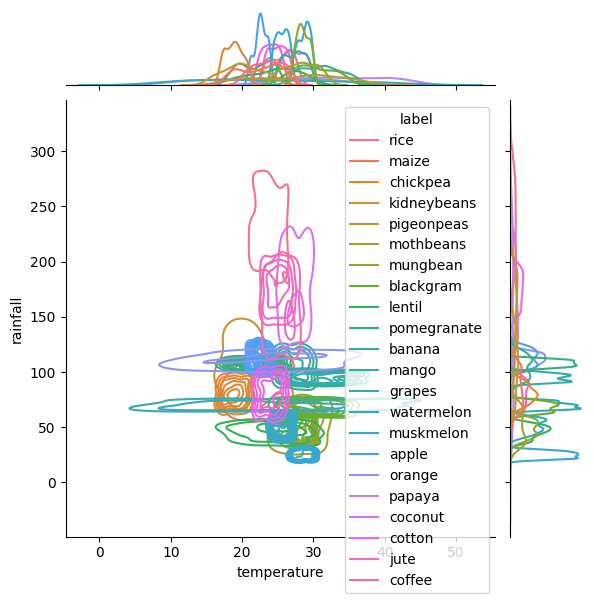

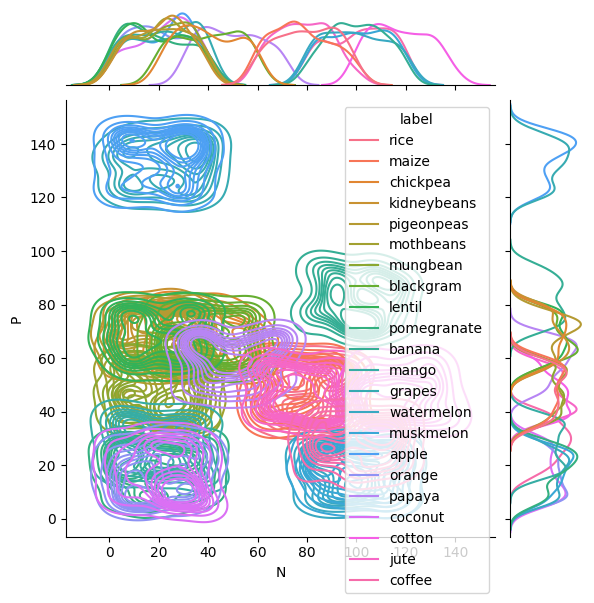

In [14]:
# Joint plots with hue for quantitative data
# We can select a few key pairs of quantitative features to visualize their joint distribution
sns.jointplot(x='temperature', y='rainfall', data=df, hue='label', kind='kde')
plt.show()

sns.jointplot(x='N', y='P', data=df, hue='label', kind='kde')
plt.show()

# You can add more joint plots for other pairs of quantitative features as needed

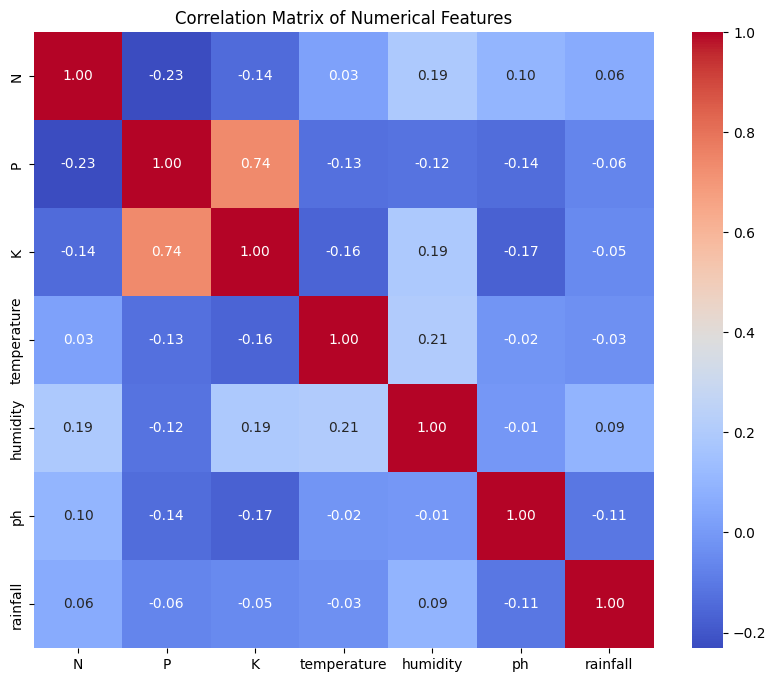

In [15]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

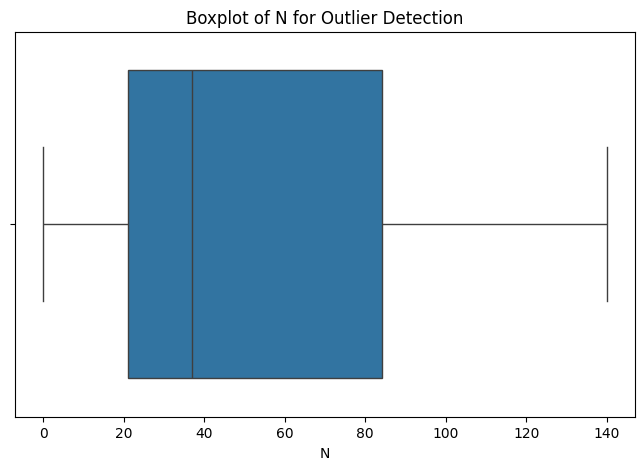

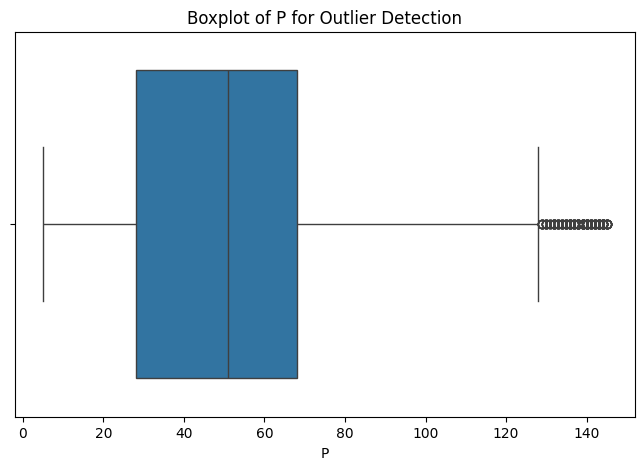

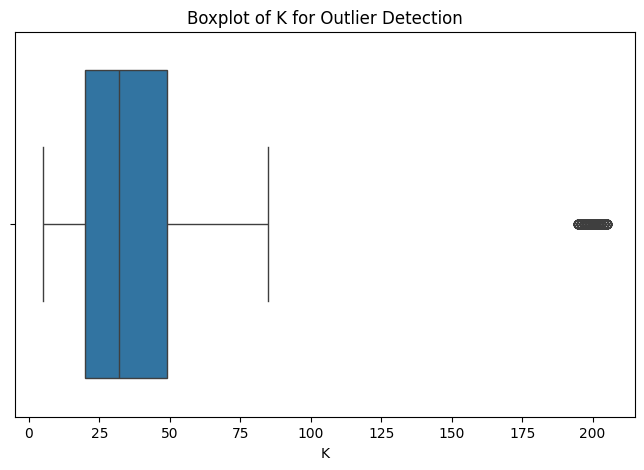

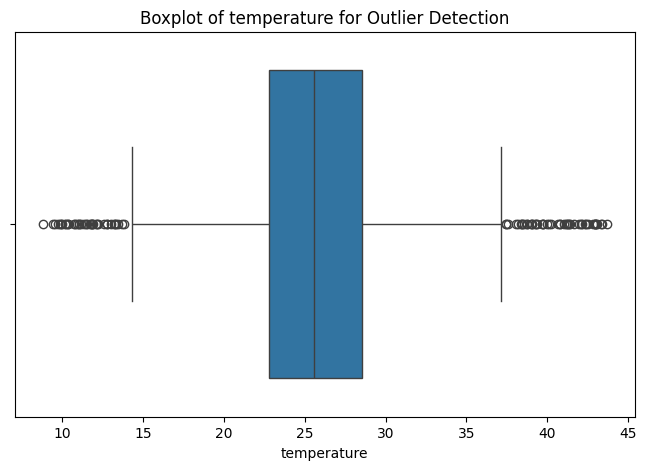

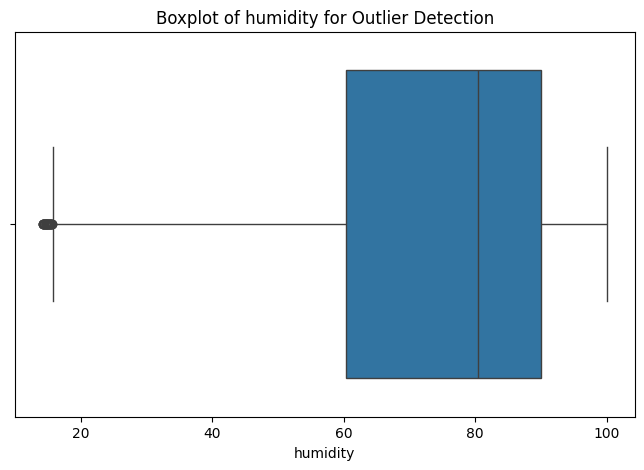

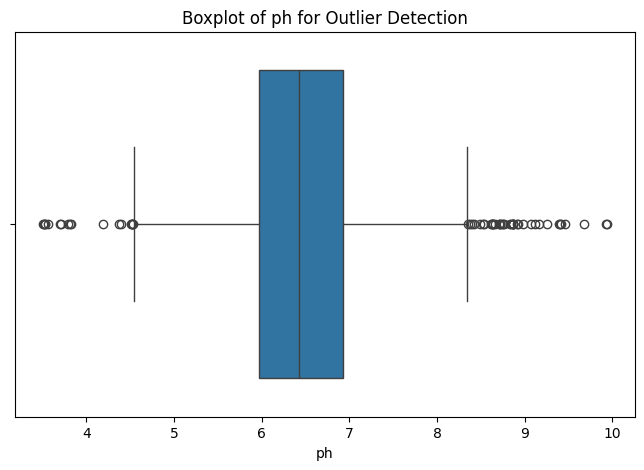

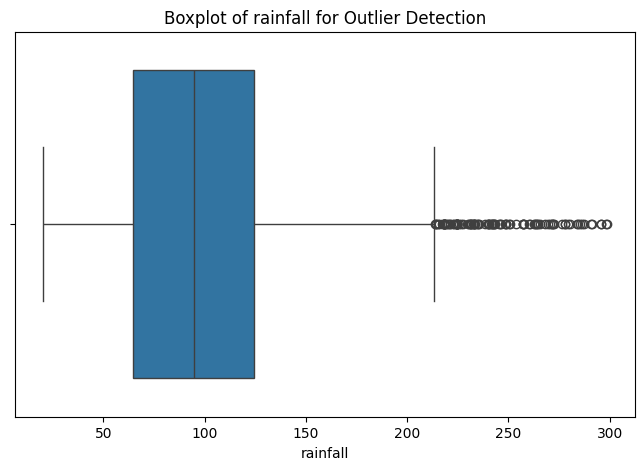

In [16]:
# Box plots for outlier detection in quantitative data
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} for Outlier Detection')
    plt.show()

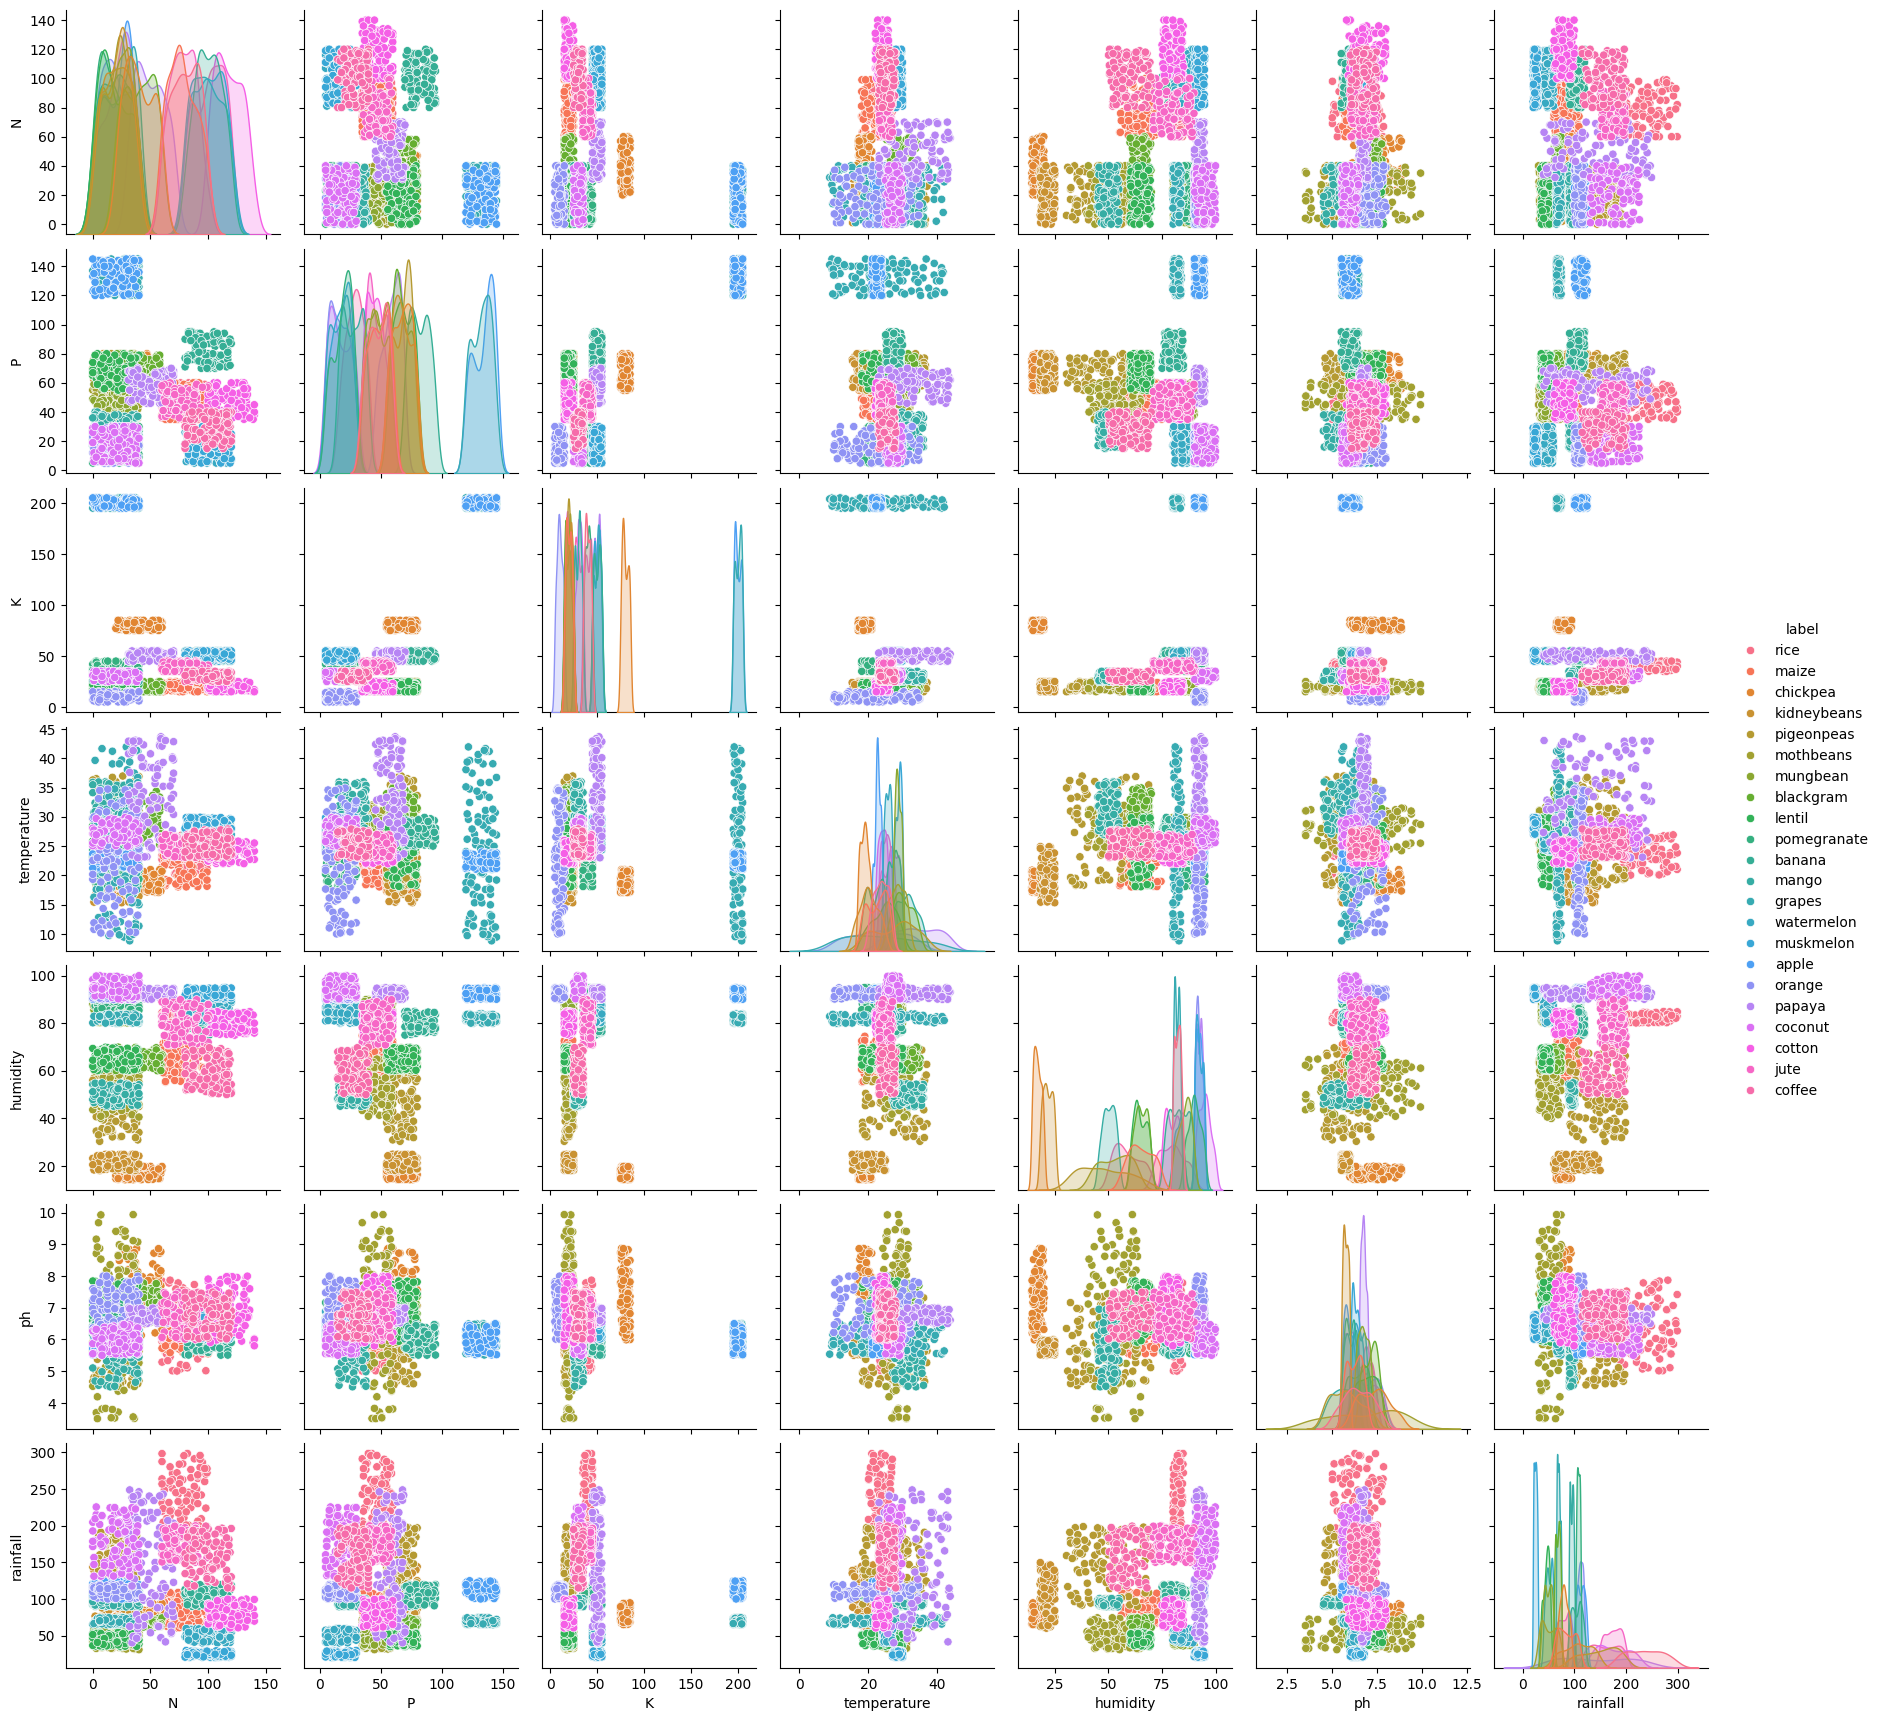

In [17]:
# Pair plot for relationships between quantitative features, with hue for the target variable
# This can take some time to generate for a large number of features
# As we have 7 numerical features, this plot might be dense, consider plotting a subset if needed
sns.pairplot(df, hue='label')
plt.show()

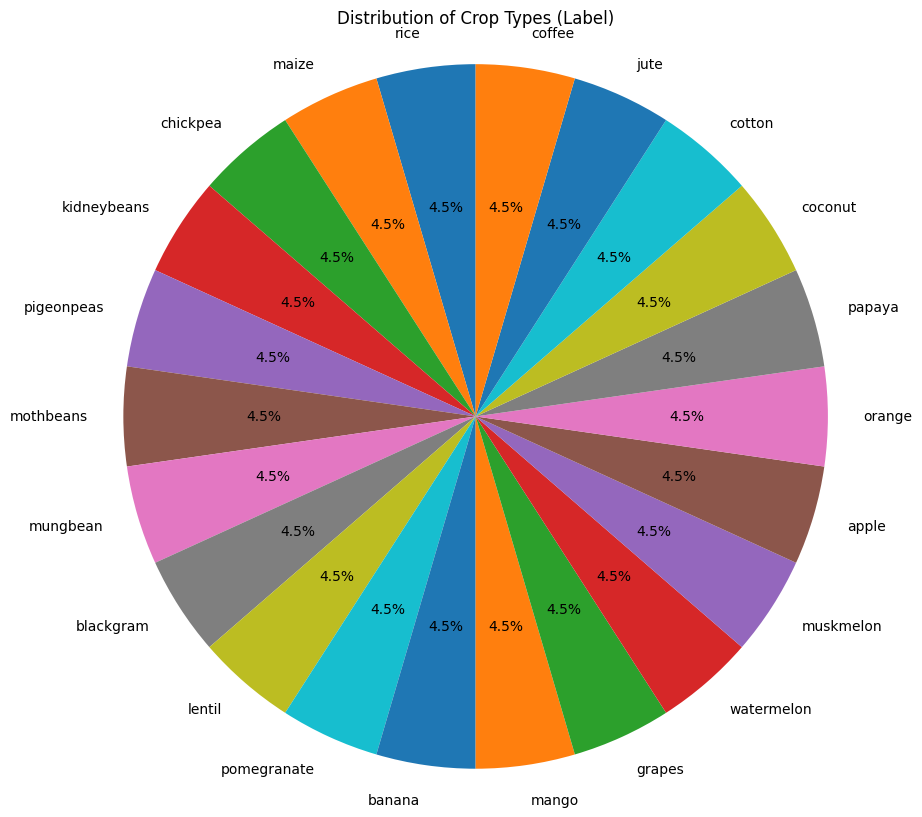

In [18]:
# Pie chart for qualitative data (target variable 'label')
# First, get the value counts
label_counts = df['label'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Crop Types (Label)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [19]:
# Separate features (X) and target (y)
X = df.drop('label', axis=1) # Features are all columns except 'label'
y = df['label'] # Target variable is the 'label' column

In [20]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state=42 ensures reproducibility of the split
# stratify=y ensures that the proportion of target variable categories is the same in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1760, 7)
X_test shape: (440, 7)
y_train shape: (1760,)
y_test shape: (440,)


In [21]:
from scipy.stats.mstats import winsorize
import numpy as np

# Apply Winsorization to handle outliers in numerical features
# We can cap values at the 5th and 95th percentiles as an example
for col in X_train.columns:
    if X_train[col].dtype in ['int64', 'float64']:
        X_train[col] = winsorize(X_train[col], limits=[0.05, 0.05])
        X_test[col] = winsorize(X_test[col], limits=[0.05, 0.05])

print("X_train after Winsorization:")
display(X_train.head())

print("\nX_test after Winsorization:")
display(X_test.head())

X_train after Winsorization:


,N,P,K,temperature,humidity,ph,rainfall
1607,4,18,15,29.771494,92.007200,7.207991,114.416179
1212,9,122,200,29.587484,80.919344,5.570291,68.064173
362,11,71,24,21.140114,22.718235,5.606620,141.605672
566,38,38,18,26.310518,61.187491,6.294130,35.734038
1671,18,12,15,17.928459,91.816688,6.206053,119.391672



X_test after Winsorization:


,N,P,K,temperature,humidity,ph,rainfall
1609,13,23,15,23.961476,90.264080,7.365338,102.695870
1072,98,79,50,25.341198,84.473213,6.435917,91.064934
1912,117,38,15,24.147295,75.882986,6.021440,69.915635
100,71,54,16,22.613600,63.690706,5.749914,87.759539
1645,40,22,15,24.536101,91.909972,6.488221,115.978799


In [22]:
from sklearn.preprocessing import StandardScaler

# Apply Standardization to scale numerical features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames for easier handling (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("X_train after Standardization:")
display(X_train_scaled.head())

print("\nX_test after Standardization:")
display(X_test_scaled.head())

X_train after Standardization:


,N,P,K,temperature,humidity,ph,rainfall
1607,-1.285331,-1.103510,-0.663364,0.978089,0.938206,1.132234,0.244482
1212,-1.146559,2.161287,3.029236,0.935179,0.431493,-1.396952,-0.681624
362,-1.091050,0.560281,-0.483724,-1.034680,-2.228289,-1.340846,0.787724
566,-0.341680,-0.475664,-0.603484,0.171017,-0.470250,-0.279089,-1.327575
1671,-0.896769,-1.291863,-0.663364,-1.783613,0.929500,-0.415111,0.343891



X_test after Standardization:


,N,P,K,temperature,humidity,ph,rainfall
1609,-1.035541,-0.946548,-0.663364,-0.376761,0.858546,1.375233,0.010312
1072,1.323588,0.811419,0.035236,-0.055021,0.593904,-0.060120,-0.222072
1912,1.850923,-0.475664,-0.663364,-0.333430,0.201332,-0.700219,-0.644632
100,0.574218,0.026612,-0.643404,-0.691075,-0.355853,-1.119550,-0.288114
1645,-0.286171,-0.977941,-0.663364,-0.242763,0.933763,0.020656,0.275703
